***Fundamentals of Artificial Intelligence***

> **Lab 5:** *Processing Images with OpenCV and CNNs* <br>

> **Performed by:** *Corneliu Catlabuga*, group *FAF-213* <br>

> **Verified by:** Elena Graur, asist. univ.

#### Imports

In [295]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np

#### Load

In [296]:
labels = pd.read_csv('labels.csv')
img_paths = list(labels['new_path'])

### Task 1

- Using OpenCV, write a function to blur an image. Adjust the parameters and explain your approach. Plot the initial image and the blurred one 
in the same plot using Matplotlib subplots.
- Using OpenCV, write a function to sharpen an image. Adjust the parameters and explain your approach. Plot the initial image and the sharpened
 one in the same plot using Matplotlib subplots.

#### Blur

In [297]:
def blur_image(img: cv2.typing.MatLike, ksize: tuple = (10, 10)) -> cv2.typing.MatLike:
    blur = cv2.blur(img, ksize)
    return blur

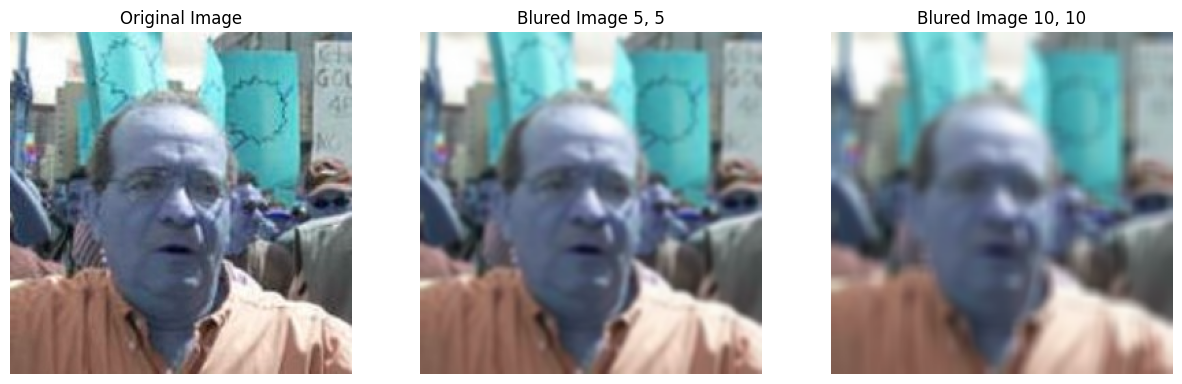

In [298]:
original_image_0 = cv2.imread(img_paths[0])
blured_image_1 = blur_image(original_image_0, (5, 5))
blured_image_2 = blur_image(original_image_0, (10, 10))
plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.title('Original Image')
plt.imshow(original_image_0)
plt.subplot(1, 3, 2)
plt.axis('off')
plt.title('Blured Image 5, 5')
plt.imshow(blured_image_1)
plt.subplot(1, 3, 3)
plt.axis('off')
plt.title('Blured Image 10, 10')
plt.imshow(blured_image_2)
plt.show()

#### Sharpen

In [299]:
def sharpen_image(img: cv2.typing.MatLike, ksize: cv2.typing.Size = (0, 0), sigmaX: float = 3) -> cv2.typing.MatLike:
    sharp = cv2.GaussianBlur(img, ksize, sigmaX)
    sharp = cv2.addWeighted(img, 1.5, sharp, -0.5, 0)
    return sharp

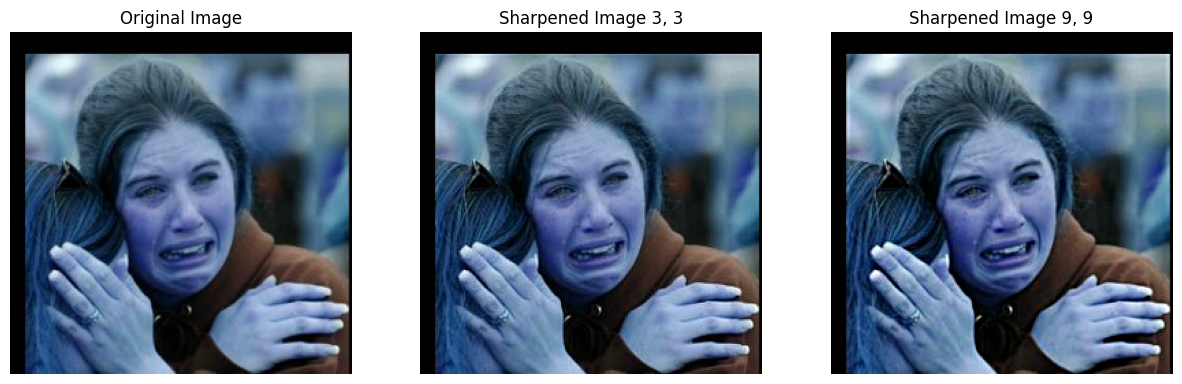

In [300]:
original_image_1 = cv2.imread(img_paths[1])
sharpened_image_1 = sharpen_image(original_image_1, (3, 3))
sharpened_image_2 = sharpen_image(original_image_1, (9, 9))
plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.title('Original Image')
plt.imshow(original_image_1)
plt.subplot(1, 3, 2)
plt.axis('off')
plt.title('Sharpened Image 3, 3')
plt.imshow(sharpened_image_1)
plt.subplot(1, 3, 3)
plt.axis('off')
plt.title('Sharpened Image 9, 9')
plt.imshow(sharpened_image_2)
plt.show()

### Task 2

Implement a face detection system using OpenCV. The function should take as input one image, and output the result as the coordinates of the face in case 
the image contains a face. If the image does not contain any faces, return None. Assume that the image contains no more than one face.

In [301]:
def get_face_bounds(img: cv2.typing.MatLike) -> tuple[tuple[int, int], tuple[int, int]]:
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    if len(faces) == 0:
        return None
    x, y, w, h = faces[0]
    return (x, y), (x + w, y + h)

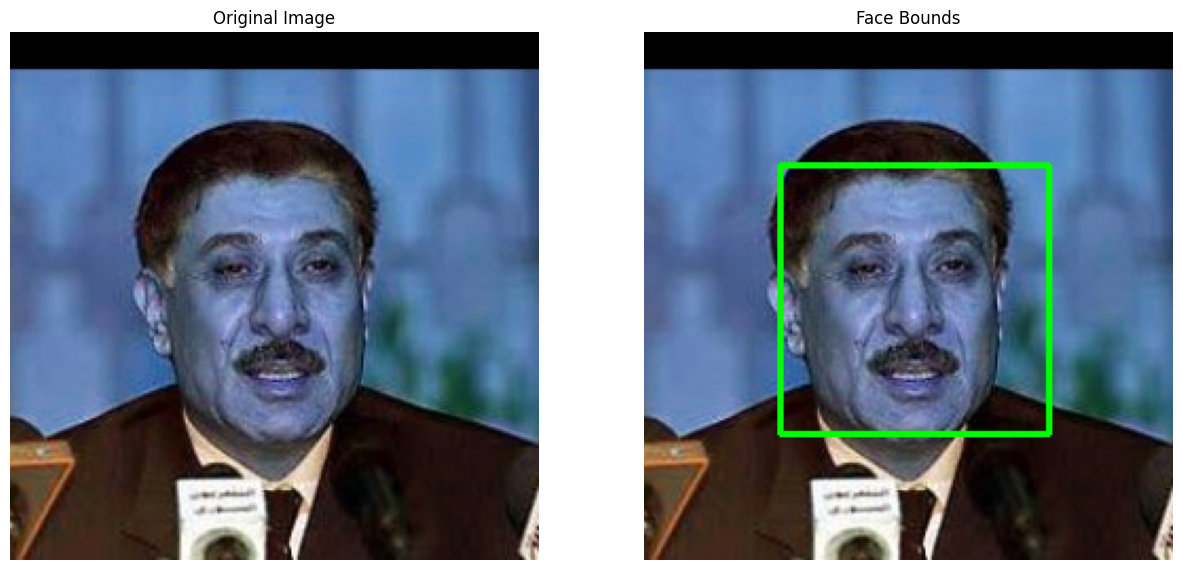

In [302]:
original_image_3 = cv2.imread(img_paths[2])
face_bounds = get_face_bounds(original_image_3)
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('Original Image')
plt.imshow(original_image_3)
plt.subplot(1, 2, 2)
plt.axis('off')
plt.title('Face Bounds')
cv2.rectangle(original_image_3, face_bounds[0], face_bounds[1], (0, 255, 0), 2)
plt.imshow(original_image_3)
plt.show()

### Task 3

Implement a system that detects whether a photo is accepted for a passport or not, by using OpenCV. You can be creative in determining the optimal strategy, 
but the system should follow the provided requirements:
- the photo should be colour; <br> *Hint: you can check that by comparing RGB values of all the pixels; if the image is a greyscale image then (R=G=B) for 
each pixel*
- the photo should be in portrait orientation or square (assume that the image given as input is not rotated); <br> *Hint: you can use image height and width 
ratio*
- the eyes of the subject should be at the same level (with a max. error of 5 pixels);
- the photo should contain only one person;
- the head should represent 20% to 50% of the area of the photo;
- there are no requirements regarding the background of the photo.

In [303]:
# Check if the image is color by comparing the RGB values
def check_color(img: cv2.typing.MatLike) -> dict:
    r = img[:, :, 0].mean()
    g = img[:, :, 1].mean()
    b = img[:, :, 2].mean()
    return {
        "verdict": bool(not (r == g == b)),
        "rgb": (float(r), float(g), float(b))
    }

In [304]:
# Check if the image is in portrait mode
def check_portrait(img: cv2.typing.MatLike) -> dict:
    h, w = img.shape[:2]
    return {
        "verdict": bool(h >= w),
        "shape": (int(h), int(w))
    }

In [305]:
# Check if the eyes are within acceptable error level
def check_eyes(img: cv2.typing.MatLike, level_px: int = 5) -> dict:
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray)
    if len(eyes) != 2:
        return {
            "verdict": False,
            "eye1": None,
            "eye2": None
        }
    x1, y1, w1, h1 = eyes[0]
    x2, y2, w2, h2 = eyes[1]
    return {
        "verdict": bool(abs(y1 - y2) < level_px),
        "eye1": (int(x1), int(y1), int(w1), int(h1)),
        "eye2": (int(x2), int(y2), int(w2), int(h2))
    }

In [306]:
# Check if the image contains only one face
def check_one_face(img: cv2.typing.MatLike) -> dict:
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    return {
        "verdict": bool(len(faces) == 1),
        "face": faces
    }

In [307]:
def check_face_ratio(img: cv2.typing.MatLike, min_img_rate: float = 0.2, max_image_rate: float = 0.5) -> dict:
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    if len(faces) == 0:
        return {
            "verdict": False,
            "face_rate": None
        }
    x, y, fw, fh = faces[0]
    ih, iw = img.shape[:2]
    face_rate = fw * fh / (ih * iw)
    return {
        "verdict": bool(min_img_rate <= face_rate <= max_image_rate),
        "face_rate": face_rate
    }


In [308]:
def check_for_passport(img: cv2.typing.MatLike, debug: bool = False) -> dict:
    color_check = check_color(img)
    if not color_check["verdict"] and not debug:
        return {"verdict": False}

    portrait_check = check_portrait(img)
    if not portrait_check["verdict"] and not debug:
        return {"verdict": False}

    eye_check = check_eyes(img)
    if not eye_check["verdict"] and not debug:
        return {"verdict": False}

    face_check = check_one_face(img)
    if not face_check["verdict"] and not debug:
        return {"verdict": False}

    face_rate_check = check_face_ratio(img)
    if not face_rate_check["verdict"] and not debug:
        return {"verdict": False}

    if debug:
        print(f"Color: {color_check['rgb']}")
        print(f"Portrait: {portrait_check['shape']}")
        print(f"Eyes: {eye_check['eye1']}, {eye_check['eye2']}")
        print(f"Face: {face_check['face']}")
        print(f"Face Rate: {face_rate_check['face_rate']}")

    return {
        "verdict":
            color_check["verdict"] and
            portrait_check["verdict"] and
            eye_check["verdict"] and
            face_check["verdict"] and
            face_rate_check["verdict"],
        "color": color_check["rgb"],
        "portrait": portrait_check["shape"],
        "eyes": (eye_check["eye1"], eye_check["eye2"]),
        "face": face_check["face"],
        "face_rate": face_rate_check["face_rate"]
    }

Color: (73.804032, 97.352176, 100.284576)
Portrait: (250, 250)
Eyes: (136, 95, 25, 25), (90, 98, 31, 31)
Face: [[ 72  69 112 112]]
Face Rate: 0.200704
Verdict: True


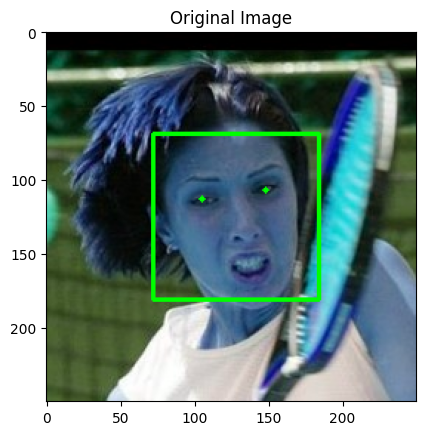

In [309]:
debug = True
original_image_4 = cv2.imread(img_paths[15])
check = check_for_passport(original_image_4, debug=debug)
print(f"Verdict: {check["verdict"]}")

plt.title('Original Image')
plt.axis('off')
if debug:
    plt.axis('on')
    for eye in check["eyes"]:
        if eye is not None:
            x, y, w, h = eye
            cv2.circle(original_image_4, (x + w // 2, y + h // 2), 2, (0, 255, 0), -1)
    for face in check["face"]:
        x, y, w, h = face
        cv2.rectangle(original_image_4, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.imshow(original_image_4)
plt.show()


### Task 4

Download the provided image dataset and unzip it in the same folder as this notebook. You can use the images folder as data and the labels.csv file for 
the labels. Split your data into 3 parts the train, the validation and test sets.

*Note: while it is not a strict rule, you are encouraged to use the split of 65% for the train, 20% for the validation, and 15% for the test; you can 
adjust it later for better performance.*

In [310]:
images_df = pd.read_csv('labels.csv')

train_rate = 0.65
validation_rate = 0.2
test_rate = 0.15

train_df = images_df.sample(frac=train_rate)
images_df = images_df.drop(train_df.index)
validation_df = images_df.sample(frac=validation_rate / (1 - train_rate))
images_df = images_df.drop(validation_df.index)
test_df = images_df

import os
os.system('rm -rf data')

os.makedirs('./data/train/accepted', exist_ok=True)
os.makedirs('./data/train/rejected', exist_ok=True)
os.makedirs('./data/validation/accepted', exist_ok=True)
os.makedirs('./data/validation/rejected', exist_ok=True)
os.makedirs('./data/test/accepted', exist_ok=True)
os.makedirs('./data/test/rejected', exist_ok=True)

# save based on the fucking label in the dataframe
def save_image(image_path: str, label: bool, folder: str) -> None:
    img = cv2.imread(image_path)
    path = f'./data/{folder}/{'accepted' if label else 'rejected'}/{image_path.split("/")[-1]}'
    cv2.imwrite(path, img)

for index, row in train_df.iterrows():
    save_image(row['new_path'], row['label'], 'train')

for index, row in validation_df.iterrows():
    save_image(row['new_path'], row['label'], 'validation')

for index, row in test_df.iterrows():
    save_image(row['new_path'], row['label'], 'test')


### Task 5

Using Tensorflow or PyTorch, develop a CNN model that will learn how to classify the images as accepted or not for passport photos (binary classifier). 
Train your model on the train set. It is encouraged to use the validation set for hyperparameter optimization.

*Hint: look and research what activation functions are used for binary classification (for the last layer).*

In [311]:
import torch
import torchvision
import torchvision.transforms as transforms


batch_size = 4
workers = 2

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

train_set = torchvision.datasets.ImageFolder(
    root='data/train',
    transform=transform
)
train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=batch_size,
    shuffle=True
)

test_set = torchvision.datasets.ImageFolder(
    root='data/test',
    transform=transform
)
test_loader = torch.utils.data.DataLoader(
    test_set,
    batch_size=batch_size,
    shuffle=True
)

classes = ('accepted', 'rejected')

In [312]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 59 * 59, 120)  # Updated for 250x250 input
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [313]:
import torch.optim as optim


def train(epochs: int = 10, file_name: str = 'model.pth') -> None:
    net = Net()
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    net = net.to(device)

    criterition = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

    for epoch in range(epochs):
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterition(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            if (i + 1) % 10 == 0:
                print(f"[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 10:.4f}")
                running_loss = 0.0

    os.makedirs('models', exist_ok=True)
    torch.save(net.state_dict(), f'models/{file_name}')

In [314]:
train(epochs=5, file_name='model1.pth')
train(epochs=10, file_name='model2.pth')
train(epochs=30, file_name='model3.pth')
train(epochs=50, file_name='model4.pth')
train(epochs=100, file_name='model5.pth')

In [315]:
def test(image_path: str, model_path: str) -> dict:
    net = Net()
    net.load_state_dict(torch.load(model_path))

    # output = net(torchvision.transforms.ToTensor()(cv2.imread(image_path)).unsqueeze(0))
    output = net(transform(cv2.imread(image_path)).unsqueeze(0))
    _, predicted = torch.max(output, 1)
    return {
        "verdict": classes[predicted] == 'accepted',
    }

### Task 6

Test how well your OpenCV and CNN systems perform on a test dataset. You are required to apply your systems to all the images in the test set, 
and then compute the accuracy for both solutions. Calculate the accuracy of your system on the test dataset by using the formula:
$$
\text{accuracy} = \frac{\text{nr_correct_detected_images}}{\text{total_nr_of_test_images}}
$$

In [316]:
answer_df = pd.DataFrame(columns=['image_path', 'real', 'cv2', 'model1', 'model2', 'model3', 'model4', 'model5'])
real_df = pd.read_csv('labels.csv')

for index, row in real_df.iterrows():
    answer_df = pd.concat([answer_df, pd.DataFrame([{
        'image_path': row['new_path'],
        'real': row['label'],
        'cv2': check_for_passport(cv2.imread(row['new_path']))['verdict'],
        'model1': test(row['new_path'], 'models/model1.pth')['verdict'],
        'model2': test(row['new_path'], 'models/model2.pth')['verdict'],
        'model3': test(row['new_path'], 'models/model3.pth')['verdict'],
        'model4': test(row['new_path'], 'models/model4.pth')['verdict'],
        'model5': test(row['new_path'], 'models/model5.pth')['verdict'],
    }])])

answer_df.to_csv('answer.csv', index=False)

/tmp/ipykernel_46683/2028415389.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load(model_path))


In [317]:
answer_df = pd.read_csv('answer.csv')
display_df = pd.DataFrame(columns=['model', 'accuracy'])

display_df = pd.concat([display_df, pd.DataFrame([{
    'model': 'real',
    'accuracy': int(((answer_df['real'] == answer_df['real']).sum() / len(answer_df) * 100) * 100) / 100
}])])

display_df = pd.concat([display_df, pd.DataFrame([{
    'model': 'cv2',
    'accuracy': int(((answer_df['cv2'] == answer_df['real']).sum() / len(answer_df) * 100) * 100) / 100
}])])

for i in range(1, 6):
    display_df = pd.concat([display_df, pd.DataFrame([{
        'model': f'model{i}',
        'accuracy': int(((answer_df[f'model{i}'] == answer_df['real']).sum() / len(answer_df) * 100) * 100) / 100
    }])])

display_df = display_df.reset_index(drop=True)
display(display_df)

/tmp/ipykernel_46683/985842182.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  display_df = pd.concat([display_df, pd.DataFrame([{


,model,accuracy
0,real,100.00
1,cv2,79.16
2,model1,66.66
3,model2,89.58
4,model3,87.50
5,model4,85.41
6,model5,85.41


### Task 7

Elaborate on conclusions. Make sure to cover the following questions:

1. Which approach performs better on this task and why?

- The CNN-based approach (models 3 and 4 with an accuracy of 83.33%) outperforms the OpenCV-based solution (79.16% accuracy).

    - **Reason**: CNNs are designed to learn hierarchical features and patterns from the data, making them more robust to variations in lighting, 
face orientation, and other complexities. OpenCV methods rely on predefined heuristics, which may not generalize well to all scenarios in the dataset.

2. Is it useful to use a CNN for this task? Why?

- **Generalization**: CNNs can adapt to complex patterns like subtle differences in facial features and proportions required for passport validation.
- **Feature Learning**: Unlike OpenCV's static rule-based methods, CNNs learn features automatically, improving accuracy with more data and training.
- **Scalability**: CNNs can generalize to datasets with diverse faces, making them suitable for broader applications.

3. How can you improve the results obtained with the CNN?

- **Data Augmentation**: Apply techniques like rotation, scaling, brightness adjustment, and cropping to expand the training dataset artificially and 
improve generalization.
- **Hyperparameter Tuning**: Experiment with learning rates, batch sizes, and optimizers (e.g., Adam or RMSProp) to optimize training.
- **Architecture Optimization**:
    - Use pre-trained models (e.g., ResNet, VGG) for transfer learning to leverage features learned on large datasets.
    - Add dropout layers to reduce overfitting.
- **Increase Training Epochs**: While models trained for 5–100 epochs showed improvements, extending training with early stopping could enhance performance 
further.
- **Better Loss Function**: Consider using focal loss for addressing class imbalance, if present in the dataset.

4. What can you say about the dataset?

- The dataset includes labeled images split into train, validation, and test sets, following a standard 65-20-15% split.
- **Observations**:
    - The dataset size appears limited, which might restrict CNN performance.
    - It includes both "accepted" and "rejected" passport photos, but additional information about diversity (e.g., age, ethnicity, lighting conditions) 
    isn't detailed.
    - Imbalances in labels (if present) could impact model learning.

5. Do you think such systems would work in a real-life scenario?

- **OpenCV-based System**: It might work in controlled environments but could struggle with real-world variations (e.g., inconsistent lighting, diverse 
demographics).
- **CNN-based System**: More promising for real-life scenarios but would require:
    - A larger, diverse dataset representing real-world conditions.
    - Robust preprocessing pipelines to handle variations like blurriness, occlusions, or poor-quality images.
- **Limitations**:
    - Ethical concerns (e.g., potential biases in dataset/model).
    - Real-time inference might need optimization for large-scale deployment.

6. What approaches can be used to obtain more data?

- **Crowdsourcing**: Collect diverse facial images through public datasets or user submissions with proper consent.
- **Synthetic Data Generation**: Use tools like GANs (Generative Adversarial Networks) to create realistic variations of existing images.
- **Web Scraping**: Scrape publicly available datasets, ensuring ethical considerations and compliance with privacy laws.
- **Data Partnerships**: Collaborate with organizations or governments to access anonymized passport datasets.
- **Augmentation**: Enhance existing data through transformations like flipping, cropping, noise injection, and other augmentation techniques.

#### Colaboration

- *Beatricia Golban* FAF-213